In [74]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn import metrics 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

In [3]:
df= pd.read_csv('updated_pollution_dataset.csv')

In [7]:
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [84]:
df.duplicated().sum()

0

In [86]:
df.isna().sum()

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64

In [9]:
df['Air Quality'].unique()

array(['Moderate', 'Good', 'Hazardous', 'Poor'], dtype=object)

In [11]:
df['Air Quality'].value_counts()

Air Quality
Good         2000
Moderate     1500
Poor         1000
Hazardous     500
Name: count, dtype: int64

In [13]:
df.groupby('Air Quality')['Temperature'].mean()

Air Quality
Good         24.94655
Hazardous    40.34780
Moderate     30.14200
Poor         34.86510
Name: Temperature, dtype: float64

In [30]:
df.groupby('Air Quality')['Population_Density'].mean()

Air Quality
Good         398.944000
Hazardous    696.010000
Moderate     497.565333
Poor         594.878000
Name: Population_Density, dtype: float64

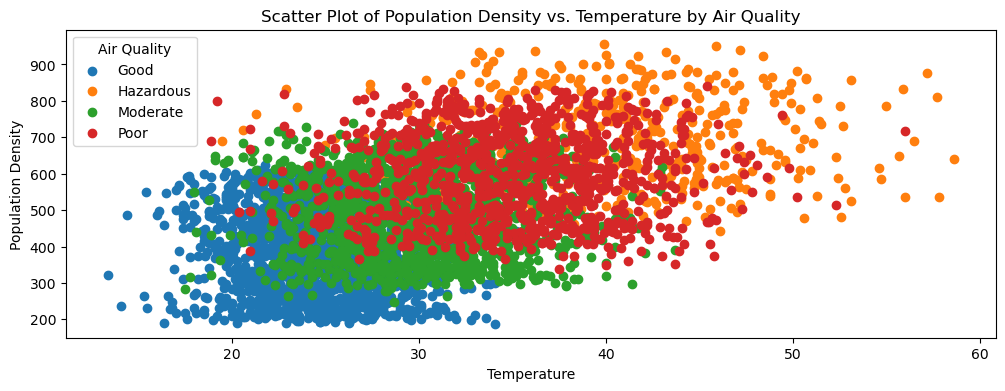

In [28]:
plt.figure(figsize = (12,4))
for species, data in df.groupby('Air Quality'):
    plt.scatter(data['Temperature'], data['Population_Density'], label = species)
plt.legend(title = 'Air Quality')
plt.xlabel('Temperature')
plt.ylabel('Population Density')
plt.title('Scatter Plot of Population Density vs. Temperature by Air Quality')
plt.show()

In [32]:
X = df.drop(columns=['Air Quality'])
y = df['Air Quality']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [60]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth=3)
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [38]:
y_pred = clf.predict(X_test)

In [40]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       387
   Hazardous       0.82      0.85      0.83        97
    Moderate       0.93      0.92      0.93       321
        Poor       0.80      0.81      0.80       195

    accuracy                           0.92      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.92      0.92      0.92      1000



In [62]:
clf.get_depth()

3

In [64]:
clf.tree_.node_count

15

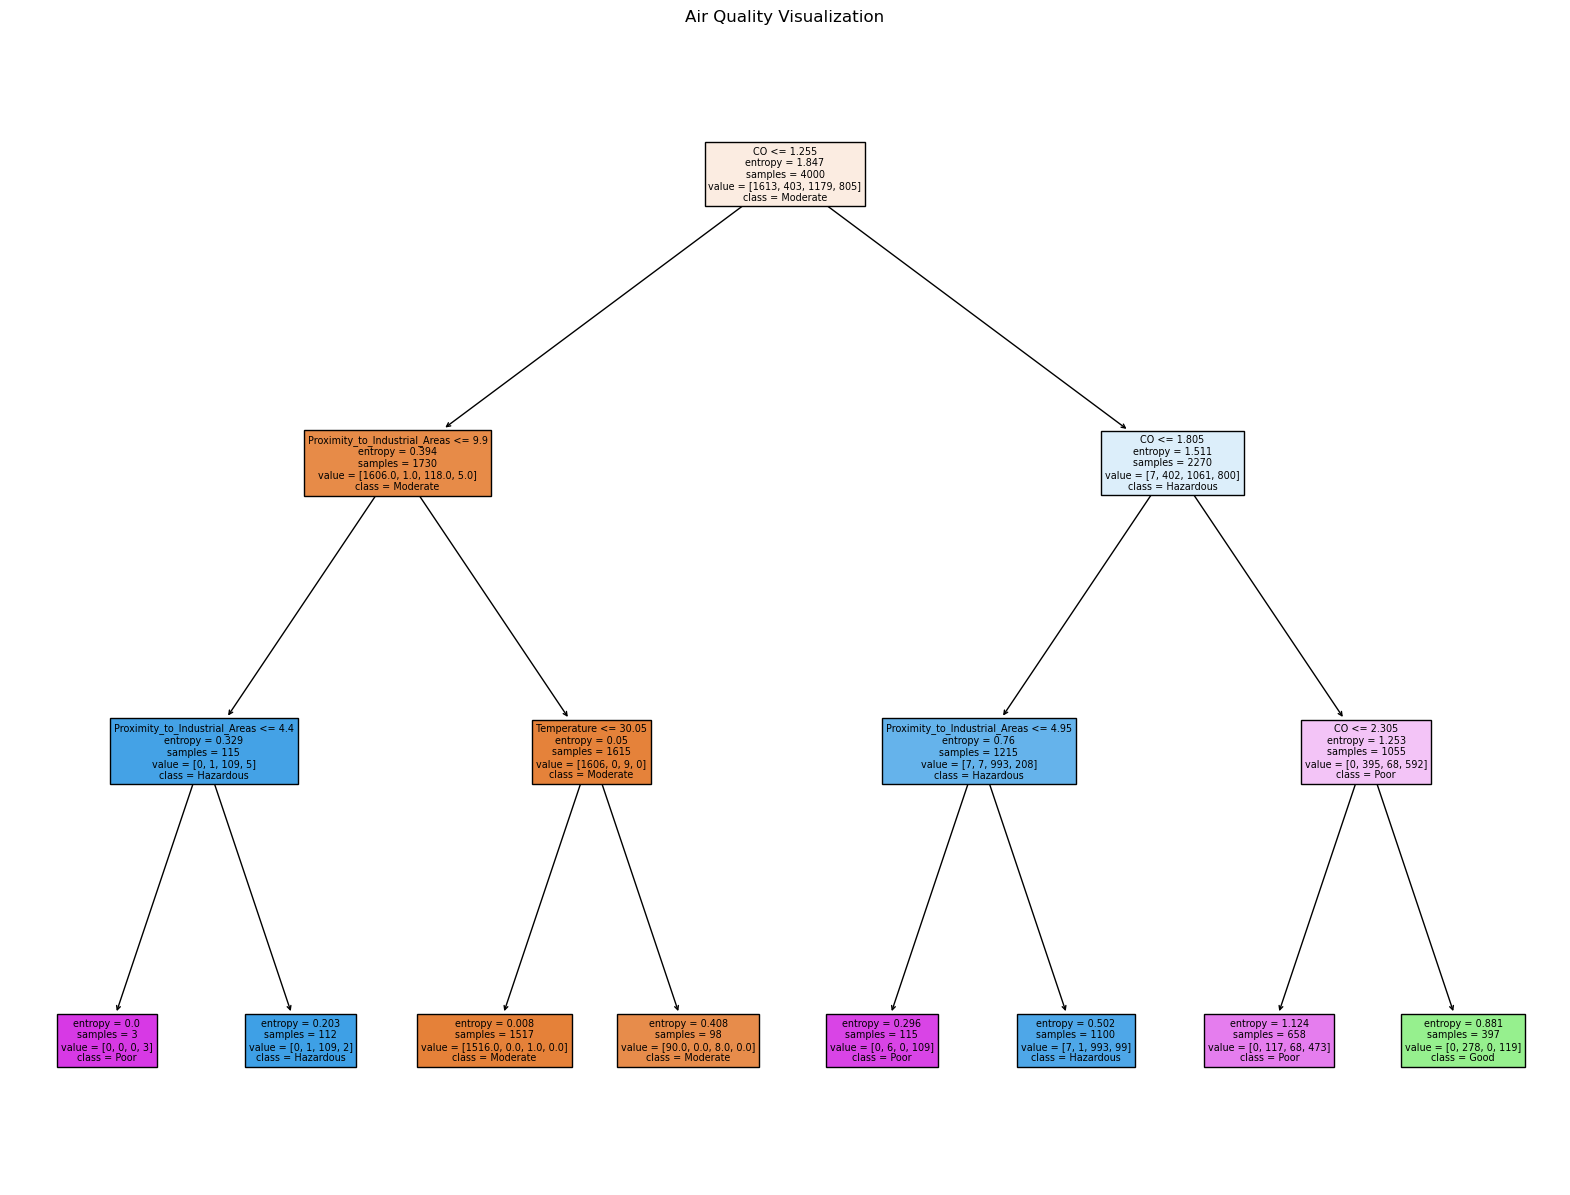

In [70]:
plt.figure(figsize= (20,15))
tree.plot_tree(clf, feature_names=list(X.columns), 
              class_names=list(df['Air Quality'].unique()), filled = True)
plt.title("Air Quality Visualization")
plt.show()

In [76]:
from sklearn.metrics import accuracy_score

In [78]:
Accuracy = accuracy_score(y_test,y_pred)

In [80]:
Accuracy

0.921